In [4]:
#Importing libraries
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt

#Machine info & package version
from watermark import watermark
%load_ext watermark
%watermark -a "Kannan Singaravelu" -u -d -v -m -iv

#Set max row to 300
pd.set_option('display.max_rows',300)

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Kannan Singaravelu

Last updated: 2023-08-17

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.2.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 13, GenuineIntel
CPU cores   : 8
Architecture: 64bit

pandas    : 1.4.2
numpy     : 1.21.5
matplotlib: 3.5.1



In [5]:
pd.set_option?

In [12]:
#define simulation function
def simulate_path(S0,mu,sigma,horizon,timesteps,n_sims):
    
    #set the seed
    random.seed(2023)
    
    #read the params
    S0 = S0
    r = mu
    T = horizon
    t = timesteps
    n = n_sims
    
    #define dt
    dt = T/t
    
    #simulate path
    S = zeros((t,n))
    S[0] = S0
    
    for i in range(0,t-1):
        w = random.standard_normal(n)
        S[i+1] = S[i] *(1+r*dt + sigma*sqrt(dt)*w)
    
    return S

In [17]:
# Assign simulateed price path to dataframe for analysis and plotting
price_path = pd.DataFrame(simulate_path(100,0.05,0.2,1,252,100000))
price_path.head()

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.916466,99.611029,98.757603,100.317489,99.891132,98.581948,103.364080,101.834833,100.144446,96.087080,...,100.526533,98.860239,98.837148,100.039456,98.913105,99.580159,99.246204,99.383916,98.362717,100.002582
2,101.102047,99.252871,98.060186,100.326270,98.603518,100.717457,104.176433,100.222994,101.468809,95.026936,...,101.555214,97.144692,99.130006,100.251700,97.617909,99.474348,98.328044,100.179019,98.775283,99.668132
3,100.572272,100.383399,98.151705,100.305081,100.957863,101.003838,105.040394,96.817626,100.584172,93.812262,...,100.687368,95.671818,98.864215,100.339384,98.261258,101.356891,97.348343,100.076692,98.885967,98.173543
4,100.103597,100.482743,99.225147,100.341161,100.908313,100.437038,104.973611,96.873934,99.199344,92.857468,...,103.588192,96.954031,100.491272,99.724911,98.236881,100.712394,97.737062,99.770981,97.046760,97.968690


In [18]:
price_path.tail()

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
247,82.452651,76.611556,96.127139,104.969419,105.913331,144.899335,107.069491,87.283685,146.641447,98.898211,...,104.511323,97.657080,102.643508,129.313037,85.226197,163.392707,83.861863,88.851576,61.924563,137.385509
248,83.625902,75.827722,96.600573,103.596788,106.015185,147.020837,108.247054,86.245161,146.001810,98.963360,...,104.219166,96.538980,104.257557,129.044406,83.385164,164.666929,83.411607,89.556030,61.695214,137.059986
249,82.015420,76.972786,96.294851,103.555391,106.868361,150.234926,107.513052,85.295482,148.012494,99.377709,...,105.629601,96.199775,102.848104,128.312085,84.227749,164.295674,84.452631,89.853093,61.860018,138.444789
250,80.642913,76.783025,95.154389,105.616379,107.497258,149.945284,107.222721,86.734576,148.618368,98.820653,...,107.406821,94.912560,102.935111,125.641846,83.604510,163.470033,83.007683,91.172556,61.333441,136.355664
251,80.782976,76.713537,94.691231,103.588088,108.632172,151.506379,107.393998,85.837756,147.199309,100.592983,...,107.665608,96.874877,102.839756,122.933012,83.634889,163.939416,81.774788,91.142776,62.203926,137.327203


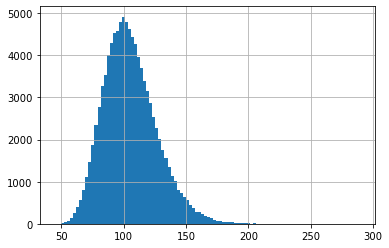

In [20]:
#Plot the histogram of the simulated price path at maturity
price_path.iloc[-1].hist(bins=100);

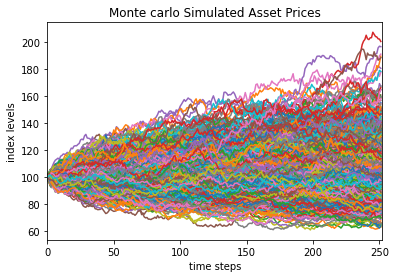

In [23]:
#Visulization of simulated Paths
#Plot initial 100 simulated path using matplotlib
plt.plot(price_path.iloc[:,:1000])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Monte carlo Simulated Asset Prices');

In [35]:
#Step 2:calculate the payoff
#Call the simulation function
S = simulate_path(100,0.05,0.2,1,252,100000)

#Define parameters
K = 100; r = 0.05; T=1

In [36]:
S.shape

(252, 100000)

In [37]:
#Calculate the discounted value of the expected payoff
C0 = exp(-r*T)*mean(maximum(0,S[-1]-K))
P0 = exp(-r*T)*mean(maximum(0,K-S[-1]))
#Print the values
print(f"European call option value is {C0:0.4f}")
print(f"European put option value is {P0:0.4f}")

European call option value is 10.4688
European put option value is 5.5756


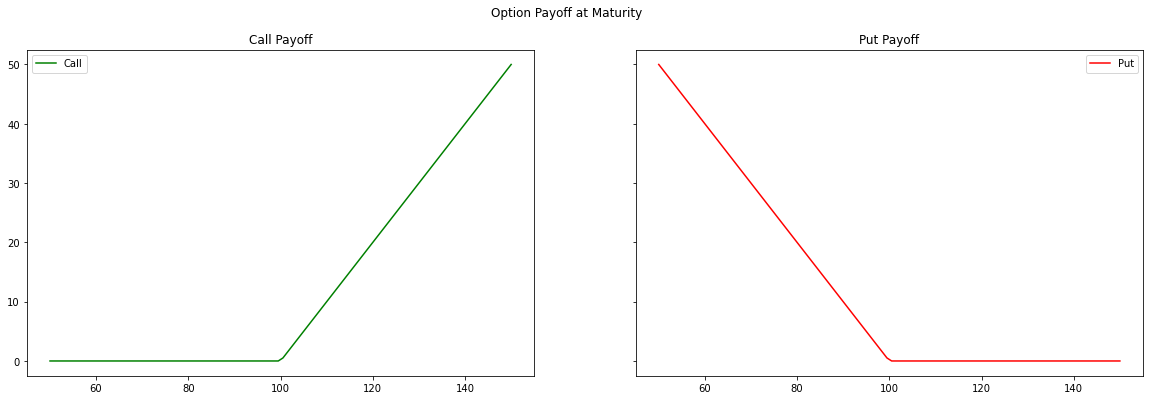

In [40]:
#range of spot prices
sT = linspace(50,150,100)

#Visualize call and put price for range of spot prices
figure,axes = plt.subplots(1,2,figsize=(20,6),sharey=True)
title,payoff,color,label = ['Call Payoff','Put Payoff'],[maximum(sT-K,0),maximum(K-sT,0)],['green','red'],['Call','Put']

#plot payoff
for i in range(2):
    axes[i].plot(sT,payoff[i],color=color[i],label=label[i])
    axes[i].set_title(title[i])
    axes[i].legend()
    
figure.suptitle('Option Payoff at Maturity');

In [41]:
#Average Price
A = S.mean(axis=0)

C0 = exp(-r*T)*mean(maximum(0,A-K))
P0 = exp(-r*T)*mean(maximum(0,K-A))

#print the values
print(f"Asian Call option value is {C0:0.4f}")
print(f"Asian Put option value is {P0:0.4f}")

Asian Call option value is 5.7777
Asian Put option value is 3.3600


In [42]:
#Call the simulation function
S = simulate_path(100,0.05,0.2,1,252,100000)

#Define parameters
K=100;B=150;r=0.05;sigma=0.2;T=1;t=252;dt=T/t;n=100000;rebate=10;value=0

# Barrier shift - continuity correction for discrete monitoring
B_shift = B*exp(0.5826*sigma*sqrt(dt))
B_shift
# Calculate the discounted value of the expeced payoff
for i in range(n):
    if S[:,i].max() < B_shift:
        value += maximum(0, S[-1,i]-K)
    else:
        value += rebate
C0 = exp(-r*T) * value/n
# Print the values
print(f"Up-and-Out Barrier Call Option Value is {C0:0.4f}")


Up-and-Out Barrier Call Option Value is 8.3939


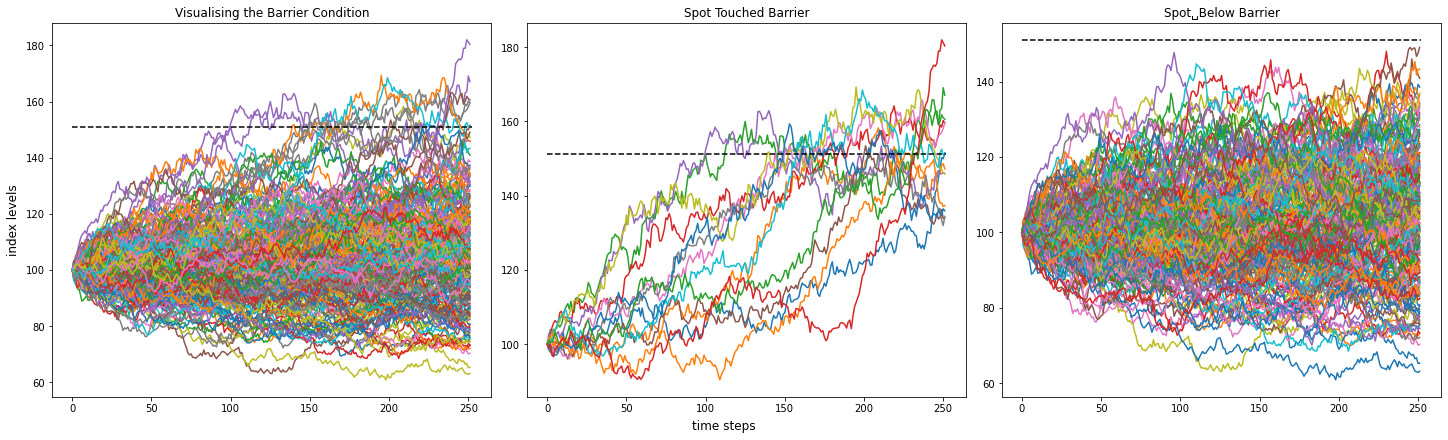

In [43]:
figure, axes = plt.subplots(1,3, figsize=(20,6), constrained_layout=True)
title = ['Visualising the Barrier Condition', 'Spot Touched Barrier', 'Spot␣Below Barrier']

axes[0].plot(S[:,:200])
for i in range(200):
    axes[1].plot(S[:,i]) if S[:,i].max() > B_shift else axes[2].plot(S[:,i])
    
for i in range(3):
    axes[i].set_title(title[i])
    axes[i].hlines(B_shift, 0, 252, colors='k', linestyles='dashed')
    
figure.supxlabel('time steps')
figure.supylabel('index levels')
plt.show()